## Data Preprocessing
The purpose of this notebook is to demo the data preprocessing flow to preprocess signal traces from the STEAD seismic signal dataset for use in CNN model training. See `data_preprocessing` module for more.

### Environment setup

In [2]:
import os
import sys
sys.path.append('../')

import numpy as np
import pandas as pd

from PIL import Image

from earthquake_detection.data_preprocessing import DataPreprocessing

### Parameters

In [3]:
SUBSAMPLE_N = 100000

### Get paths to saved dataset files

In [4]:
# Get data directory path to the locally saved STEAD dataset files from saved environment variable
data_dir_path = os.environ.get('STEAD_DATA_DIR_PATH', 'key does not exist')

In [5]:
data_dir_path

'/Users/kaelynnrose/Documents/DATA_SCIENCE/data/STEAD'

### Data preprocessing

In [4]:
# Initialize DataPreprocessing object
preproc = DataPreprocessing(data_dir_path)

In [5]:
# Data preprocessing
raw_signals, imgs, metadata = preproc.preprocess(subsample_n=SUBSAMPLE_N)

Data preprocessing for subsample of signal data of size 100000
Fetching data paths from directory
Parsing metadata from csv files


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.39s/it]


Number of total traces: 1265657
Number of earthquake traces: 1030231
Number of noise traces: 235426
Fetching subsample of traces from hdf5 files
Parsing traces from h5py filepaths


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:56<00:00, 19.41s/it]


Creating spectrograms from signal traces and saving to array for model training


  8%|████████▌                                                                                                      | 7739/100000 [03:12<34:36, 44.43it/s]/opt/miniconda3/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [1:37:31<00:00, 17.09it/s]


In [6]:
# Save raw signals
signals = np.array(list(raw_signals.values()))
np.save(f'../../../data/STEAD/extracted_raw_signals_subsample_{SUBSAMPLE_N}.npy', signals)

# Save images
np.save(f'../../../data/STEAD/created_spectrogram_images_subsample_{SUBSAMPLE_N}.npy', imgs)

# Save metadata
metadata.to_feather(f'../../../data/STEAD/extracted_metadata_subsample_{SUBSAMPLE_N}.feather')

### Results

In [7]:
len(raw_signals)

100000

In [8]:
len (imgs)

100000

In [9]:
metadata

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk
trace_name,,,,,,,,,,,,,,,,,,,,,
B087.PB_20110415160922_EV,PB,B087,EH,33.495500,-116.602667,1139.0,500.0,manual,0.58,3.080000,...,CI,NaN,0.14590,16.23,96.6,[15.89999962 17.20000076 6.5 ],[[1896.]],09:23.3,earthquake_local,1
B084.PB_20070610234247_EV,PB,B084,EH,33.611570,-116.456370,1271.0,400.0,manual,0.52,17.879999,...,CI,NaN,0.97140,108.03,159.7,[27.79999924 27.39999962 29.29999924],[[2513.]],42:48.8,earthquake_local,1
AOPR.PR_20180718125903_EV,PR,AOPR,BH,18.346645,-66.753975,355.1,600.0,manual,0.19,10.900000,...,NaN,NaN,0.54550,60.55,189.0,[26.89999962 27.29999924 24.60000038],[[2966.]],59:03.1,earthquake_local,1
B084.PB_20130324214626_EV,PB,B084,HH,33.611570,-116.456370,1271.0,900.0,manual,0.63,2.430000,...,NaN,NaN,0.09953,11.07,182.0,[24.60000038 19.10000038 29.60000038],[[1534.]],46:27.9,earthquake_local,1
B086.PB_20121122004827_EV,PB,B086,EH,33.557500,-116.531000,1392.0,900.0,manual,0.62,10.240000,...,CI,NaN,0.55260,61.45,320.4,[30.60000038 16.5 21. ],[[2323.]],48:28.2,earthquake_local,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC04.C1_20180116180542_NO,C1,AC04,HH,-28.204600,-71.073900,249.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-16 18:05:42,noise,6
LL07.C1_20180115145229_NO,C1,LL07,HH,-42.832350,-73.477850,53.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 14:52:29,noise,6
ALN.HT_20180116182600_NO,HT,ALN,HH,40.895699,26.049700,110.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-16 18:26:00,noise,6


#### Example images created through preprocessing

------------------ 
 Example image 0: earthquake_local 
------------------


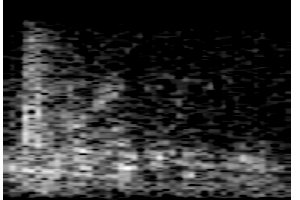

network_code                                                           PB
receiver_code                                                        B087
receiver_type                                                          EH
receiver_latitude                                                 33.4955
receiver_longitude                                            -116.602667
receiver_elevation_m                                               1139.0
p_arrival_sample                                                    500.0
p_status                                                           manual
p_weight                                                             0.58
p_travel_sec                                                         3.08
s_arrival_sample                                                    724.0
s_status                                                           manual
s_weight                                                             0.58
source_id                             

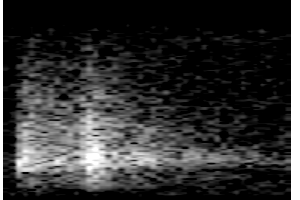

network_code                                                           PB
receiver_code                                                        B084
receiver_type                                                          EH
receiver_latitude                                                33.61157
receiver_longitude                                             -116.45637
receiver_elevation_m                                               1271.0
p_arrival_sample                                                    400.0
p_status                                                           manual
p_weight                                                             0.52
p_travel_sec                                                    17.879999
s_arrival_sample                                                   1676.0
s_status                                                           manual
s_weight                                                             0.52
source_id                             

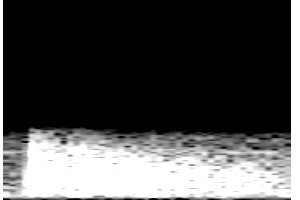

network_code                                                           PR
receiver_code                                                        AOPR
receiver_type                                                          BH
receiver_latitude                                               18.346645
receiver_longitude                                             -66.753975
receiver_elevation_m                                                355.1
p_arrival_sample                                                    600.0
p_status                                                           manual
p_weight                                                             0.19
p_travel_sec                                                         10.9
s_arrival_sample                                                   1426.0
s_status                                                           manual
s_weight                                                              0.0
source_id                             

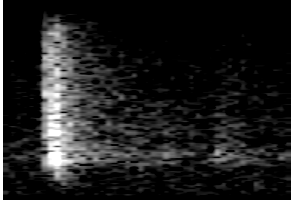

network_code                                                           PB
receiver_code                                                        B084
receiver_type                                                          HH
receiver_latitude                                                33.61157
receiver_longitude                                             -116.45637
receiver_elevation_m                                               1271.0
p_arrival_sample                                                    900.0
p_status                                                           manual
p_weight                                                             0.63
p_travel_sec                                                         2.43
s_arrival_sample                                                   1075.0
s_status                                                           manual
s_weight                                                             0.59
source_id                             

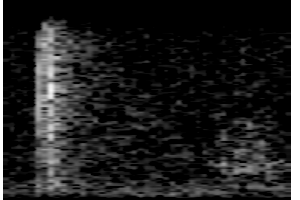

network_code                                                           PB
receiver_code                                                        B082
receiver_type                                                          EH
receiver_latitude                                               33.598182
receiver_longitude                                            -116.596005
receiver_elevation_m                                               1374.8
p_arrival_sample                                                    800.0
p_status                                                           manual
p_weight                                                             0.64
p_travel_sec                                                         2.68
s_arrival_sample                                                    995.0
s_status                                                           manual
s_weight                                                              0.6
source_id                             

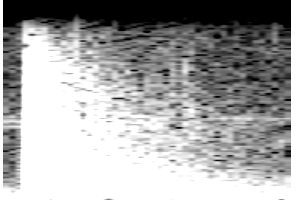

network_code                                                           HV
receiver_code                                                        AIND
receiver_type                                                          HH
receiver_latitude                                               19.372067
receiver_longitude                                            -155.457228
receiver_elevation_m                                               1524.0
p_arrival_sample                                                    500.0
p_status                                                           manual
p_weight                                                             0.63
p_travel_sec                                                         3.08
s_arrival_sample                                                    730.0
s_status                                                           manual
s_weight                                                              0.0
source_id                             

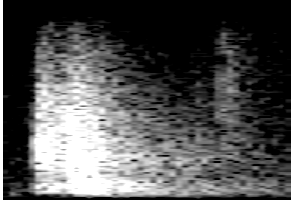

network_code                                                           PB
receiver_code                                                        B082
receiver_type                                                          HH
receiver_latitude                                               33.598182
receiver_longitude                                            -116.596005
receiver_elevation_m                                               1374.8
p_arrival_sample                                                    700.0
p_status                                                           manual
p_weight                                                             0.61
p_travel_sec                                                        10.55
s_arrival_sample                                                   1427.0
s_status                                                           manual
s_weight                                                             0.61
source_id                             

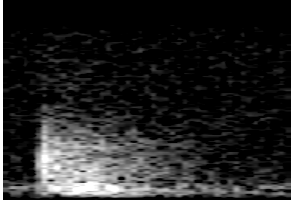

network_code                                                           PB
receiver_code                                                        B078
receiver_type                                                          EH
receiver_latitude                                                 35.8377
receiver_longitude                                              -120.3452
receiver_elevation_m                                                386.8
p_arrival_sample                                                    800.0
p_status                                                           manual
p_weight                                                             0.57
p_travel_sec                                                         7.01
s_arrival_sample                                                   1433.0
s_status                                                       autopicker
s_weight                                                             0.86
source_id                             

In [10]:
for i in [0,1,2,3,4996,4997,4998,4999]:
    signal_type = metadata.iloc[i]['trace_category']
    print(f'------------------ \n Example image {i}: {signal_type} \n------------------')
    im = Image.fromarray(imgs[i])
    display(im)
    print(metadata.iloc[i])